# H2-O2 reaction inside a reactor cell

---

Chemical kinetics and thermodynamic calculations of gasous reactor cell analysis

## Import nessesary packages

---
* `numpy`
* `pandas`
* `matplotlib.pyplot`

In [1]:
import cantera as ct
import numpy as np, pandas as pd, matplotlib.pyplot as plt

## Sample calculation

---

Adiabatic flame condition calculation using reactor model with GRI Mech 3.0

In [2]:
gas = ct.Solution('../data/h2o2.yaml')

In [3]:
gas.TPX = 300.0, ct.one_atm, 'H2:2, O2:1'

In [4]:
gas.equilibrate('SV')

In [5]:
gas()


  ohmech:

       temperature   1530 K
          pressure   3.4454e+05 Pa
           density   0.48787 kg/m^3
  mean mol. weight   18.013 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -1.0665e+07       -1.9212e+08  J
   internal energy       -1.1372e+07       -2.0484e+08  J
           entropy             13403        2.4144e+05  J/K
    Gibbs function       -3.1173e+07       -5.6153e+08  J
 heat capacity c_p            2642.4             47598  J/K
 heat capacity c_v            2180.8             39284  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2        1.9272e-05         0.0001722           -26.103
                 H        9.9878e-09        1.7849e-07           -13.052
                 O        2.5716e-08        2.8954e-08           -18.0

## Chemistry sweeps from lean to rich

---

With initial thermal condition held to NTP, the chemical reactor sweeps of various initial chemical compositions.

In [6]:
X_conditions = np.linspace(start=0.1, stop=4.0, num=100)
phi = X_conditions / 2.0
gas_conditions = [ct.Solution('../data/h2o2.yaml') for _ in X_conditions]

In [7]:
df_equillibrium = pd.DataFrame()
p, T = [], []
for cond, val in zip(gas_conditions, X_conditions):
    cond.TPX = 300.0, ct.one_atm, 'H2:' + str(val) + ', O2: 1.0'
    cond.equilibrate('SV')
    p.append(cond.P)
    T.append(cond.T)

In [8]:
df_equillibrium = pd.DataFrame(
    {
        'p': p,
        'T': T,
    },
    index=phi,
)

Text(0, 0.5, 'T [K]')

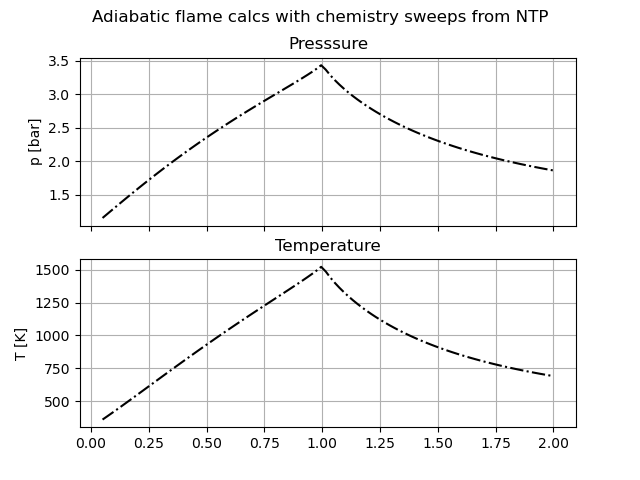

In [9]:
%matplotlib widget
fig = plt.figure('Thermo-chemical equillibrium')
axs = fig.subplots(nrows=2, ncols=1, sharex=True)
(df_equillibrium['p'] / 1e5).plot(style='-.', color='k', grid=True, ax=axs[0])
df_equillibrium['T'].plot(style='-.', color='k', grid=True, ax=axs[1])
fig.suptitle('Adiabatic flame calcs with chemistry sweeps from NTP')
axs[0].set_title('Presssure')
axs[1].set_title('Temperature')
axs[0].set_ylabel('p [bar]')
axs[1].set_ylabel('T [K]')